In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from numpy import genfromtxt
from sklearn.metrics import accuracy_score
from sklearn import svm, tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## Loading the data 

In [26]:
my_data = genfromtxt('naive_bayes.csv', delimiter=',')
my_data = my_data[1:,:]
X = my_data[:,:5]
y = my_data[:,5]

## Gaussian Naive baise classifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
# mnb = MultinomialNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : { (y_test != y_pred).sum()}")
# predictions = mnb.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_pred, y_test))

Number of mislabeled points out of a total 31 points : 14
Accuracy Score:  0.5483870967741935


## SVM classifier

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

# gamma and c can be optimized with grid search
clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train.flatten())

predictions = clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(predictions, y_test.flatten()))


Accuracy Score:  0.5384615384615384


## Decision Tree

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=5)

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train.flatten())

predictions = clf.predict(x_test)

print('Accuracy Score: ', accuracy_score(predictions, y_test.flatten()))

Accuracy Score:  0.42857142857142855


## K-Nearest neighbour classifier

/home/mohit/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mohit/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


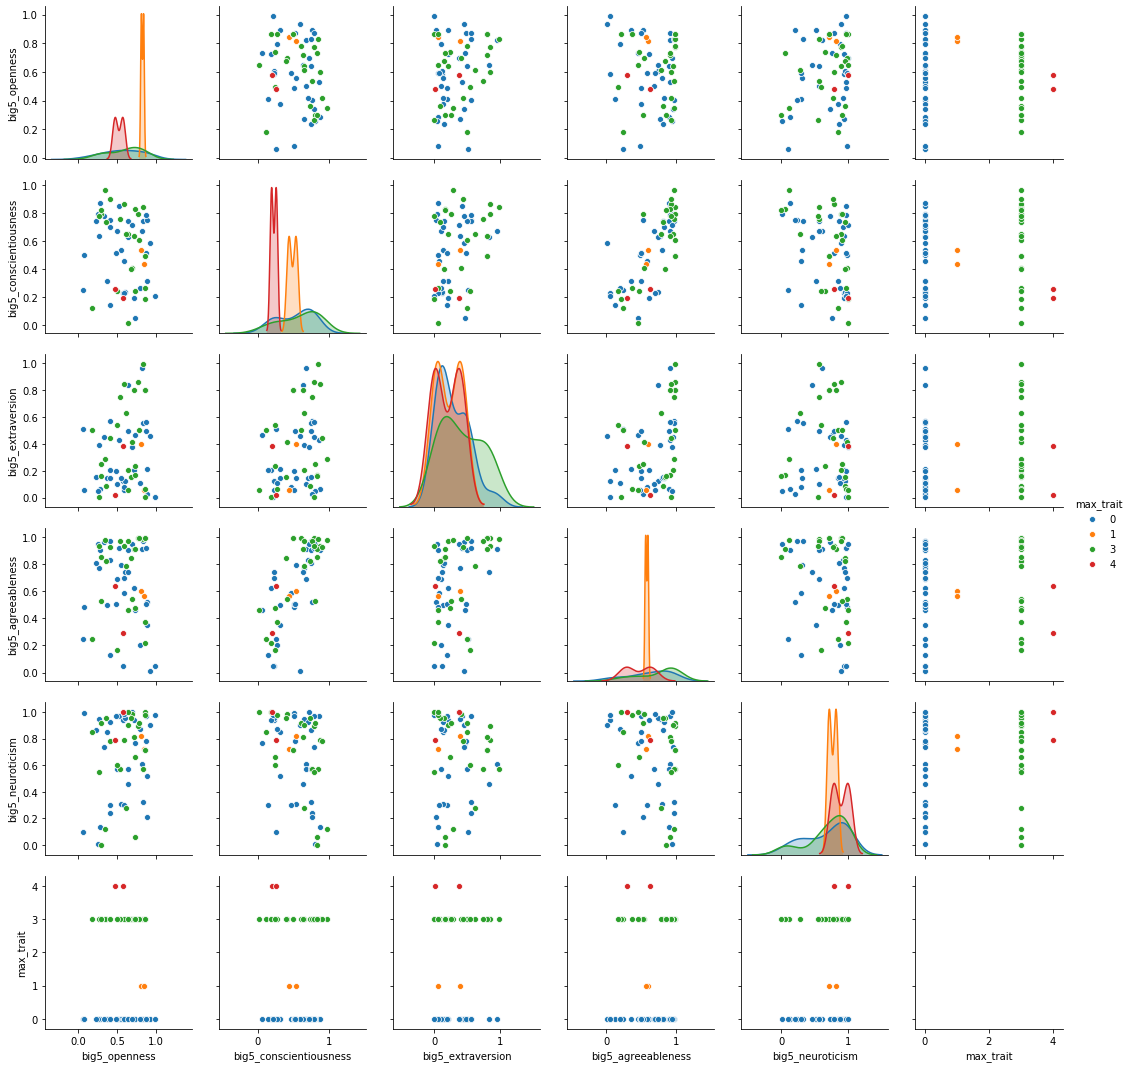

In [59]:
df = pd.read_csv('naive_bayes.csv')
sns.pairplot(df, hue='max_trait')

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=101)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[12  0  0  0]
 [ 1  0  0  0]
 [ 9  0  2  0]
 [ 1  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.69        12
         1.0       0.00      0.00      0.00         1
         3.0       1.00      0.18      0.31        11
         4.0       0.00      0.00      0.00         1

    accuracy                           0.56        25
   macro avg       0.38      0.30      0.25        25
weighted avg       0.69      0.56      0.46        25



/home/mohit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
